# ACM 158 PS3 PROBLEM 1
Eduardo Beltrame

In [151]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
from patsy import dmatrices
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
from matplotlib.ticker import MaxNLocator


In [36]:
df = pd.read_csv('dataset5.csv')

In [54]:
df

,X1,X2,Y
0,0.852677,0.289277,0.763951
1,0.362499,0.373333,2.176286
2,-0.626204,0.562130,2.081236
3,-0.241528,0.418334,-0.348059
4,-1.892076,-0.653932,-0.562755
...,...,...,...
195,0.067945,-1.013978,0.487769
196,0.022669,0.082966,1.430228
197,0.201935,-1.256165,0.785857
198,-0.900569,0.090771,-0.319796


### These are the 3 models we want to compare. We use the patsy python library to convert their model description into a design matrix: https://patsy.readthedocs.io/en/latest/

$$ f_1(X) = \beta_0 + \beta_1 X_1 + \beta_2 X_2 $$
$$ f_2(X) = \beta_0 + \beta_1 X_1 + \beta_2 \sin(X_2) $$
$$ f_3(X) = \beta_0 + \beta_1 X_1 $$


In [55]:
y1, X1 = dmatrices('Y ~ X1 + X2', data=df, return_type='dataframe')
y2, X2 = dmatrices('Y ~ X1 + np.sin(X2)', data=df, return_type='dataframe')
y3, X3 = dmatrices('Y ~ X1', data=df, return_type='dataframe')

#### We use numpy permutations to do the train/test splits repeatedly for each model

In [180]:

results = pd.DataFrame()
modelnum = 0
for _X, _y in zip([X1, X2, X3], [y1, y2, y3]):
    modelnum+=1

    mse_list = []
    for r in range(20):
        # this creates a random shuffling of an array with 200 indices.
        shuffling = np.random.permutation(list(range(200)))
        train_idx=shuffling[:100]
        test_idx=shuffling[100:]

        mod = sm.OLS(_y.loc[train_idx], _X.loc[train_idx]) 
        res = mod.fit()
    #     display(res.summary())

        test_prediction = res.predict(_X.loc[test_idx])

        test_residuals =  test_prediction - _y.loc[test_idx]['Y']
        mse = np.sqrt(np.dot(test_residuals, test_residuals))
        mse_list.append(mse)
        
    results['mse_model'+str(modelnum)]=mse_list

# Plot results with error bars for 1 standard deviation
From these results, model1 and model2 are equivalent, but both are clearly better than model3

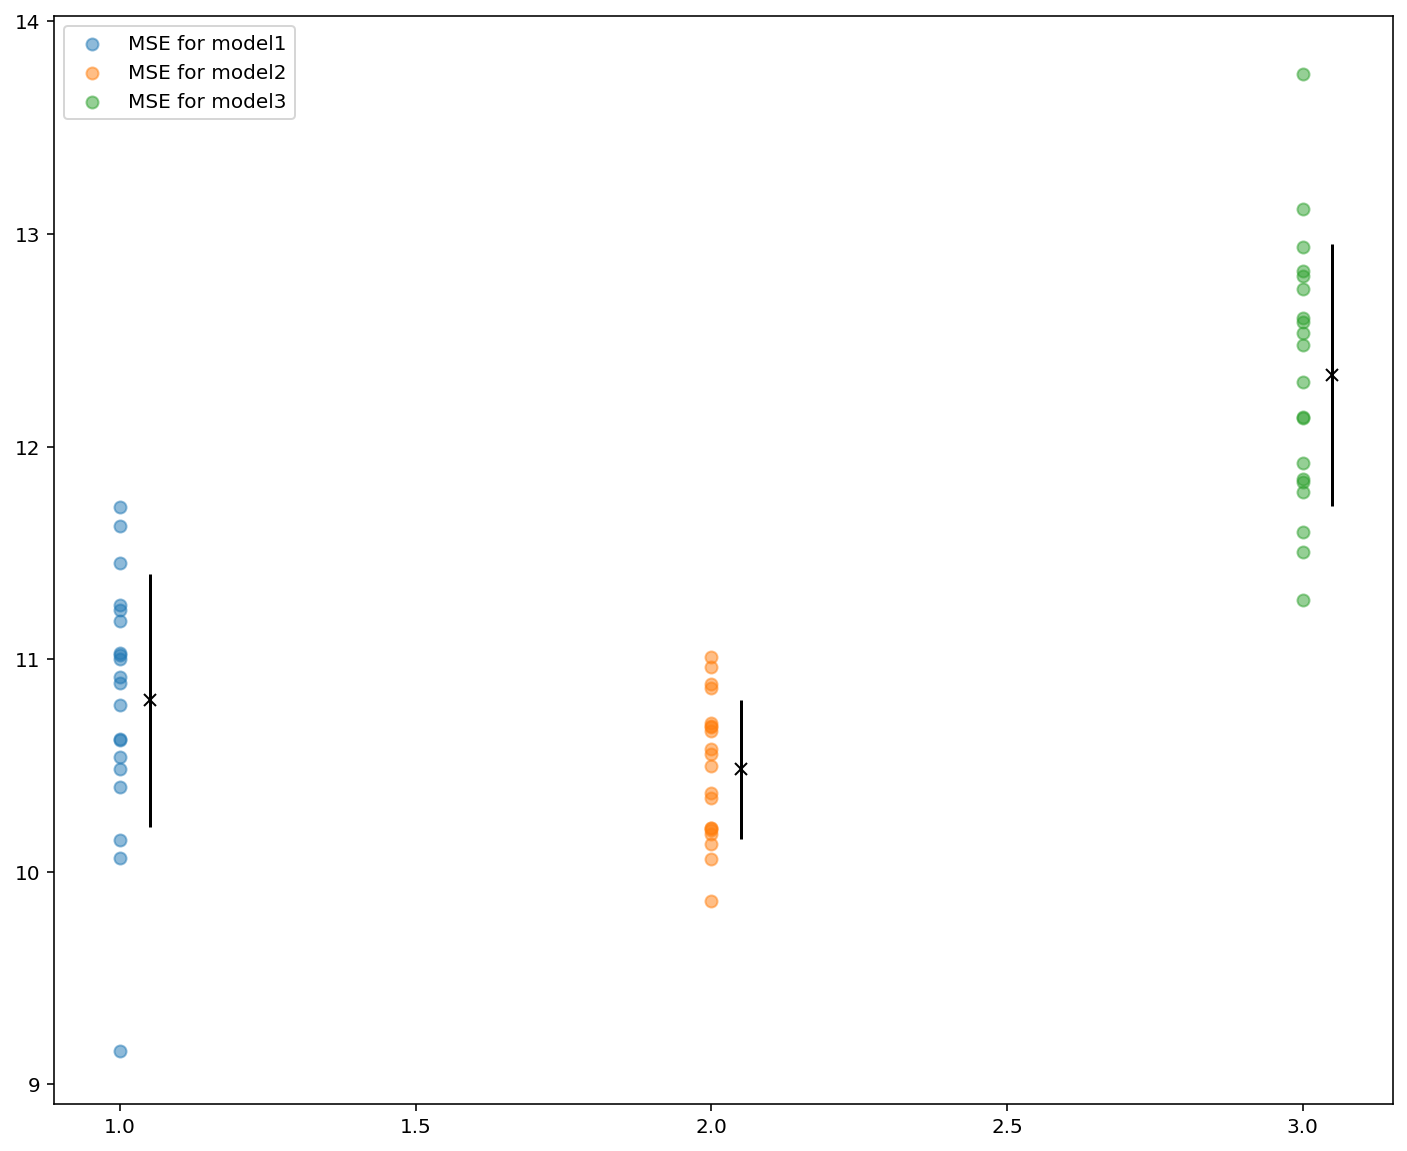

In [181]:
i = 1
for col in results.columns:

    plt.scatter(len(results[col])*[i], results[col], label = 'MSE for model' + str(i), alpha = 0.5)
    plt.errorbar(x=i+0.05, y=np.mean(results[col]), yerr=results[col].std(), fmt='-x', color = 'k')

   
    i = i+1

plt.legend()
fig = plt.gcf()
fig.set_size_inches(12, 10)

plt.show()